In [510]:
import requests
import pandas as pd
import json
import math
import time
import matplotlib.pyplot as plt

In [511]:
# 폰트설정
plt.rc("font", family='Malgun Gothic')

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

In [512]:
url = 'https://apis.data.go.kr/1160100/service/GetStockSecuritiesInfoService/getStockPriceInfo'

In [513]:
params = {    
    "serviceKey" : "ZNDMSK1BGpTDfkdspDstsvTtnu8NEvdRgJ119e3M/awgSc0nPTOTT5mr8YoQ+M2MK3WGTCNS1tFugk0P74ZTUw==",
    "numOfRows" : "1",
    "pageNo" : "1",
    "resultType" : "json" ,
    "itmsNm" : "LG화학",
    "beginBasDt" : "20200101",
    "endBasDt" : "20241231"
}

In [514]:
res = requests.get(url, params=params)
res.raise_for_status()
res.status_code

200

In [515]:
res.url

'https://apis.data.go.kr/1160100/service/GetStockSecuritiesInfoService/getStockPriceInfo?serviceKey=ZNDMSK1BGpTDfkdspDstsvTtnu8NEvdRgJ119e3M%2FawgSc0nPTOTT5mr8YoQ%2BM2MK3WGTCNS1tFugk0P74ZTUw%3D%3D&numOfRows=1&pageNo=1&resultType=json&itmsNm=LG%ED%99%94%ED%95%99&beginBasDt=20200101&endBasDt=20241231'

In [516]:
json_str = res.text
res.text

'{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL SERVICE."},"body":{"numOfRows":1,"pageNo":1,"totalCount":1051,"items":{"item":[{"basDt":"20240403","srtnCd":"051910","isinCd":"KR7051910008","itmsNm":"LG화학","mrktCtg":"KOSPI","clpr":"403000","vs":"-21000","fltRt":"-4.95","mkp":"416000","hipr":"418500","lopr":"400500","trqu":"479871","trPrc":"194455220500","lstgStCnt":"70592343","mrktTotAmt":"28448714229000"}]}}}}'

In [517]:
# json 포맷 문자열을 파이썬의 딕셔너리로 변환
dictionary = json.loads(json_str)
type(dictionary)

dict

In [518]:
dictionary

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'},
  'body': {'numOfRows': 1,
   'pageNo': 1,
   'totalCount': 1051,
   'items': {'item': [{'basDt': '20240403',
      'srtnCd': '051910',
      'isinCd': 'KR7051910008',
      'itmsNm': 'LG화학',
      'mrktCtg': 'KOSPI',
      'clpr': '403000',
      'vs': '-21000',
      'fltRt': '-4.95',
      'mkp': '416000',
      'hipr': '418500',
      'lopr': '400500',
      'trqu': '479871',
      'trPrc': '194455220500',
      'lstgStCnt': '70592343',
      'mrktTotAmt': '28448714229000'}]}}}}

In [519]:
# # 'item' 키에 해당하는 데이터를 데이터프레임으로 변환
# df = pd.json_normalize(dictionary['response']['body']['items']['item'])
# df

In [520]:
totalCount = dictionary['response']['body']['totalCount']
totalCount

1051

In [521]:
# 한번에 조회 수 : 1000건
max_numOfRows = 1000

In [522]:
# http 요청 횟수
request_cnt = math.ceil(totalCount / max_numOfRows)
request_cnt

2

In [523]:
def get_params (numOfRows, req_cnt):
    params = {    
    "serviceKey" : "ZNDMSK1BGpTDfkdspDstsvTtnu8NEvdRgJ119e3M/awgSc0nPTOTT5mr8YoQ+M2MK3WGTCNS1tFugk0P74ZTUw==",
    "numOfRows" : numOfRows,
    "pageNo" : req_cnt,
    "resultType" : "json" ,
    "itmsNm" : "LG화학",
    "beginBasDt" : "20200101",
    "endBasDt" : "20240404"
    }
    print(params)
    return params

In [524]:
df = pd.DataFrame()
for i in range(1, request_cnt+1):
    res = requests.get(url, params=get_params(max_numOfRows, i))
    res.raise_for_status()
    time.sleep(2)

    if res.status_code == 200:
        # json포맷 문자열을 파이썬의 딕셔너리로 변환
        dictionary = json.loads(res.text)

        # 'item'키에 해당하는 데이터를 데이터프레임으로 변환
        df_temp = pd.json_normalize(dictionary['response']['body']['items']['item'])
#         display(df_temp) # 불러오는거 찍어보기
        df = pd.concat([df, df_temp])
    else:
        print('가져오기 실패')
        break
    

{'serviceKey': 'ZNDMSK1BGpTDfkdspDstsvTtnu8NEvdRgJ119e3M/awgSc0nPTOTT5mr8YoQ+M2MK3WGTCNS1tFugk0P74ZTUw==', 'numOfRows': 1000, 'pageNo': 1, 'resultType': 'json', 'itmsNm': 'LG화학', 'beginBasDt': '20200101', 'endBasDt': '20240404'}
{'serviceKey': 'ZNDMSK1BGpTDfkdspDstsvTtnu8NEvdRgJ119e3M/awgSc0nPTOTT5mr8YoQ+M2MK3WGTCNS1tFugk0P74ZTUw==', 'numOfRows': 1000, 'pageNo': 2, 'resultType': 'json', 'itmsNm': 'LG화학', 'beginBasDt': '20200101', 'endBasDt': '20240404'}


In [525]:
# df

In [526]:
df.shape

(1051, 15)

In [527]:
# 엑셀로 저장
df.to_excel('LG화학주가추세.xlsx', index=False)

In [528]:
lg_stock_info = pd.read_excel('LG화학주가추세.xlsx')

In [529]:
lg_stock_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   basDt       1051 non-null   int64  
 1   srtnCd      1051 non-null   int64  
 2   isinCd      1051 non-null   object 
 3   itmsNm      1051 non-null   object 
 4   mrktCtg     1051 non-null   object 
 5   clpr        1051 non-null   int64  
 6   vs          1051 non-null   int64  
 7   fltRt       1051 non-null   float64
 8   mkp         1051 non-null   int64  
 9   hipr        1051 non-null   int64  
 10  lopr        1051 non-null   int64  
 11  trqu        1051 non-null   int64  
 12  trPrc       1051 non-null   int64  
 13  lstgStCnt   1051 non-null   int64  
 14  mrktTotAmt  1051 non-null   int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 123.3+ KB


In [530]:
lg_stock_info['basDt'] = lg_stock_info['basDt'].map(lambda x: f'{str(x)[:4]}-{str(x)[4:6]}-{str(x)[6:]}')

In [531]:
lg_stock_info['basDt'] = pd.to_datetime(lg_stock_info['basDt'])

In [532]:
lg_stock_info.dtypes

basDt         datetime64[ns]
srtnCd                 int64
isinCd                object
itmsNm                object
mrktCtg               object
clpr                   int64
vs                     int64
fltRt                float64
mkp                    int64
hipr                   int64
lopr                   int64
trqu                   int64
trPrc                  int64
lstgStCnt              int64
mrktTotAmt             int64
dtype: object

In [533]:
lg_stock_info.head(1)

,basDt,srtnCd,isinCd,itmsNm,mrktCtg,clpr,vs,fltRt,mkp,hipr,lopr,trqu,trPrc,lstgStCnt,mrktTotAmt
0,2024-04-03,51910,KR7051910008,LG화학,KOSPI,403000,-21000,-4.95,416000,418500,400500,479871,194455220500,70592343,28448714229000


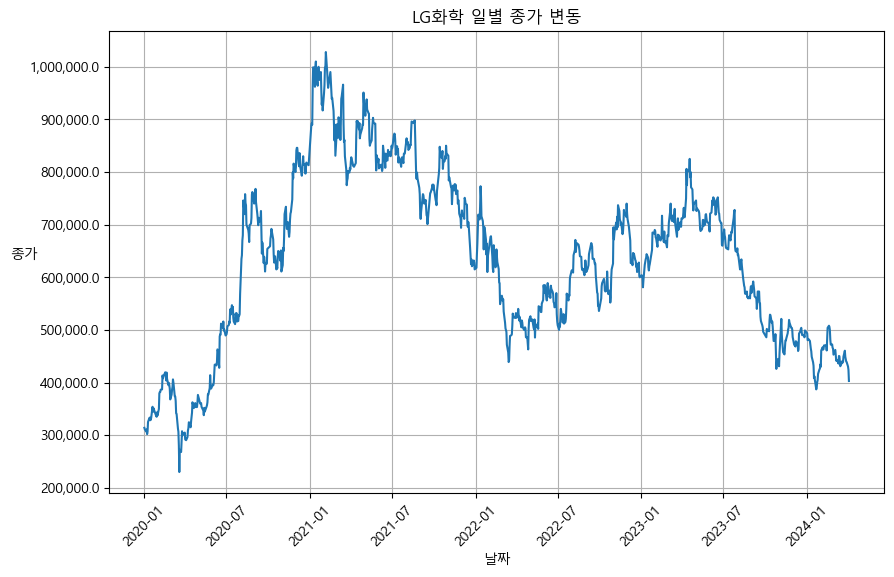

In [543]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 6))
plt.plot(lg_stock_info['basDt'], lg_stock_info['clpr'])

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,}'.format(x)))

plt.title('LG화학 일별 종가 변동')
plt.xlabel('날짜')
plt.ylabel('종가', rotation='horizontal')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()